## Quatar_WordCup 

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
players_df=pd.read_csv(r"D:\\IBM_Data_Science\\Data_set\\player_stats.csv")
match_df=pd.read_csv(r"D:\\IBM_Data_Science\\Data_set\\Fifa_WC_2022_Match_data.csv",encoding='latin1')

In [3]:
match_df.head(5)

,match_no,day_of_week,date,hour,venue,referee,group,1,2,attendance,...,1_panelties_scored,2_panelties_scored,1_goal_prevented,2_goal_prevented,1_own_goal,2_own_goal,1_forced_turnovers,2_forced_turnovers,1_defensive_pressure_applied,2_defensive_pressure_applied
0,1,Sun,20-Nov-22,17:00,Al Bayt Stadium,Daniele Orsato,Group A,QATAR,ECUADOR,67372,...,0,1,6,5,0,0,52,72,256,279
1,2,Mon,21-Nov-22,14:00,Khalifa International Stadium,Raphael Claus,Group B,ENGLAND,IRAN,45334,...,0,1,8,13,0,0,63,72,139,416
2,3,Mon,21-Nov-22,17:00,Al Thumama Stadium,Wilton Sampaio,Group A,SENEGAL,NETHERLANDS,41721,...,0,0,9,15,0,0,63,73,263,251
3,4,Mon,21-Nov-22,20:00,Ahmed bin Ali Stadium,Abdulrahman Ibrahim Al Jassim,Group B,UNITED STATES,WALES,43418,...,0,1,7,7,0,0,81,72,242,292
4,5,Tue,22-Nov-22,11:00,Lusail Iconic Stadium,Slavko Vincic,Group C,ARGENTINA,SAUDI ARABIA,88012,...,1,0,4,14,0,0,65,80,163,361


### Informarion about the dataset

In [4]:
match_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 59 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   match_no                         64 non-null     int64  
 1   day_of_week                      64 non-null     object 
 2   date                             64 non-null     object 
 3   hour                             64 non-null     object 
 4   venue                            64 non-null     object 
 5   referee                          64 non-null     object 
 6   group                            64 non-null     object 
 7   1                                64 non-null     object 
 8   2                                64 non-null     object 
 9   attendance                       64 non-null     int64  
 10  1_xg                             64 non-null     float64
 11  2_xg                             64 non-null     float64
 12  1_poss                  

In [6]:
## check null values
match_df.isnull().sum()

match_no                           0
day_of_week                        0
date                               0
hour                               0
venue                              0
referee                            0
group                              0
1                                  0
2                                  0
attendance                         0
1_xg                               0
2_xg                               0
1_poss                             0
2_poss                             0
1_goals                            0
2_goals                            0
score                              0
1_attempts                         0
2_attempts                         0
1_conceded                         0
2_conceded                         0
1_goal_inside_penalty_area         0
2_goal_inside_penalty_area         0
1_goal_outside_penalty_area        0
2_goal_outside_penalty_area        0
1_ontarget                         0
2_ontarget                         0
1

In [7]:
# No of matches played on respective venue
match_df['venue'].value_counts()

Lusail Iconic Stadium            10
Al Bayt Stadium                   9
Khalifa International Stadium     8
Al Thumama Stadium                8
Education City Stadium            8
Ahmed bin Ali Stadium             7
Stadium 974                       7
Al Janoub Stadium                 7
Name: venue, dtype: int64

In [8]:
## Match with highest attendence audience
match_df[match_df['attendance']==match_df['attendance'].max()]

,match_no,day_of_week,date,hour,venue,referee,group,1,2,attendance,...,1_panelties_scored,2_panelties_scored,1_goal_prevented,2_goal_prevented,1_own_goal,2_own_goal,1_forced_turnovers,2_forced_turnovers,1_defensive_pressure_applied,2_defensive_pressure_applied
23,24,Sat,26-Nov-22,20:00,Lusail Iconic Stadium,Daniele Orsato,Group C,ARGENTINA,MEXICO,88966,...,0,0,4,5,0,0,63,79,220,327
60,61,Tue,13-Dec-22,20:00,Lusail Iconic Stadium,Daniele Orsato,Semi-Final,ARGENTINA,CROATIA,88966,...,1,0,12,10,0,0,85,63,321,260
63,64,Sun,18-Dec-22,16:00,Lusail Iconic Stadium,Szymon Marciniak,Final,ARGENTINA,FRANCE,88966,...,1,2,11,21,0,0,87,104,280,409


**From the above result, all the three highest attendance matches were played on "Lusail Iconic Stadium" with the presence of 88966 spectators.**

In [9]:
# Create "total_goal" feature, by adding 1_goal, 2 goal
match_df['total_goals']=match_df['1_goals']+match_df['2_goals']

In [10]:
# Highest goal scoring in the match
match_df[match_df['total_goals']==match_df['total_goals'].max()]

,match_no,day_of_week,date,hour,venue,referee,group,1,2,attendance,...,2_panelties_scored,1_goal_prevented,2_goal_prevented,1_own_goal,2_own_goal,1_forced_turnovers,2_forced_turnovers,1_defensive_pressure_applied,2_defensive_pressure_applied,total_goals
1,2,Mon,21-Nov-22,14:00,Khalifa International Stadium,Raphael Claus,Group B,ENGLAND,IRAN,45334,...,1,8,13,0,0,63,72,139,416,8


- Match number 2 has highest goals, which was played between ENGLAND and IRAN with 8 goals.

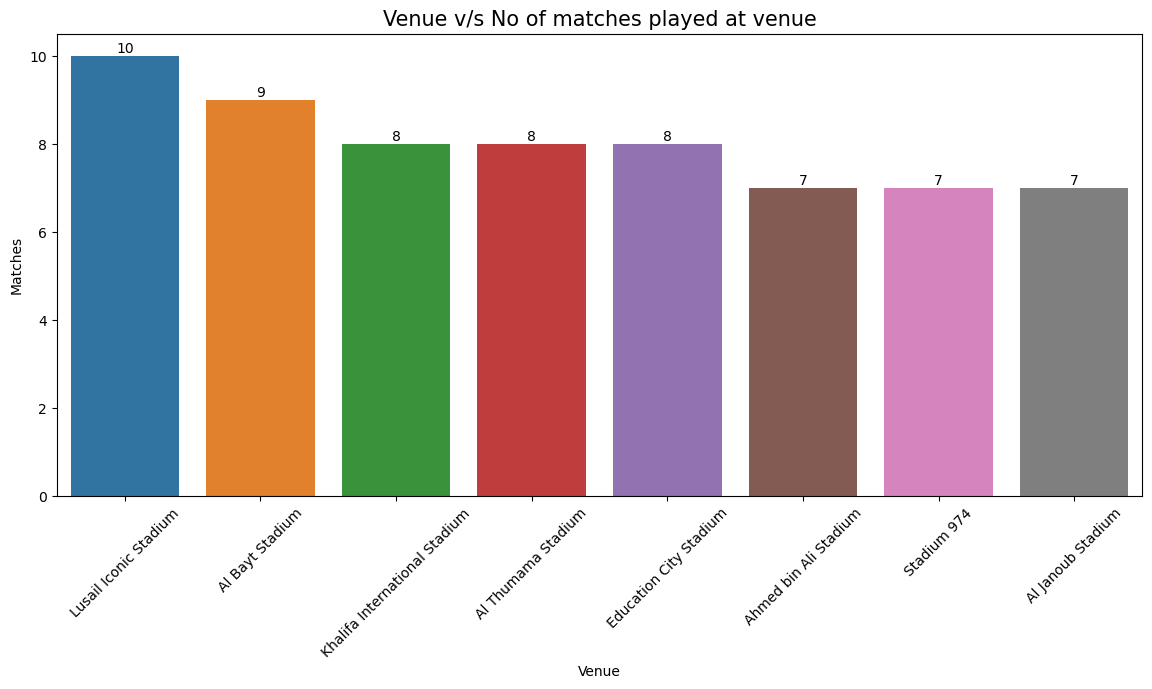

In [11]:
## Let's plot Bar graph Venu v/s No of matches played at revenue
x=match_df['venue'].value_counts().index
y=match_df['venue'].value_counts().values
df=pd.DataFrame({'Venue':x, 'Matches':y})

plt.figure(figsize=(14,6))
ax=sns.barplot(data=df,x='Venue',y='Matches')
ax.bar_label(ax.containers[0])
plt.title("Venue v/s No of matches played at venue", fontsize=15)
plt.xticks(rotation=45)
plt.show()

In [12]:
## total attendance in all the revenue of alll matches played
match_df.groupby("venue")['attendance'].sum().sort_values(ascending=False)

venue
Lusail Iconic Stadium            874607
Al Bayt Stadium                  601149
Khalifa International Stadium    355552
Education City Stadium           349114
Al Thumama Stadium               337685
Ahmed bin Ali Stadium            299517
Stadium 974                      297854
Al Janoub Stadium                288774
Name: attendance, dtype: int64

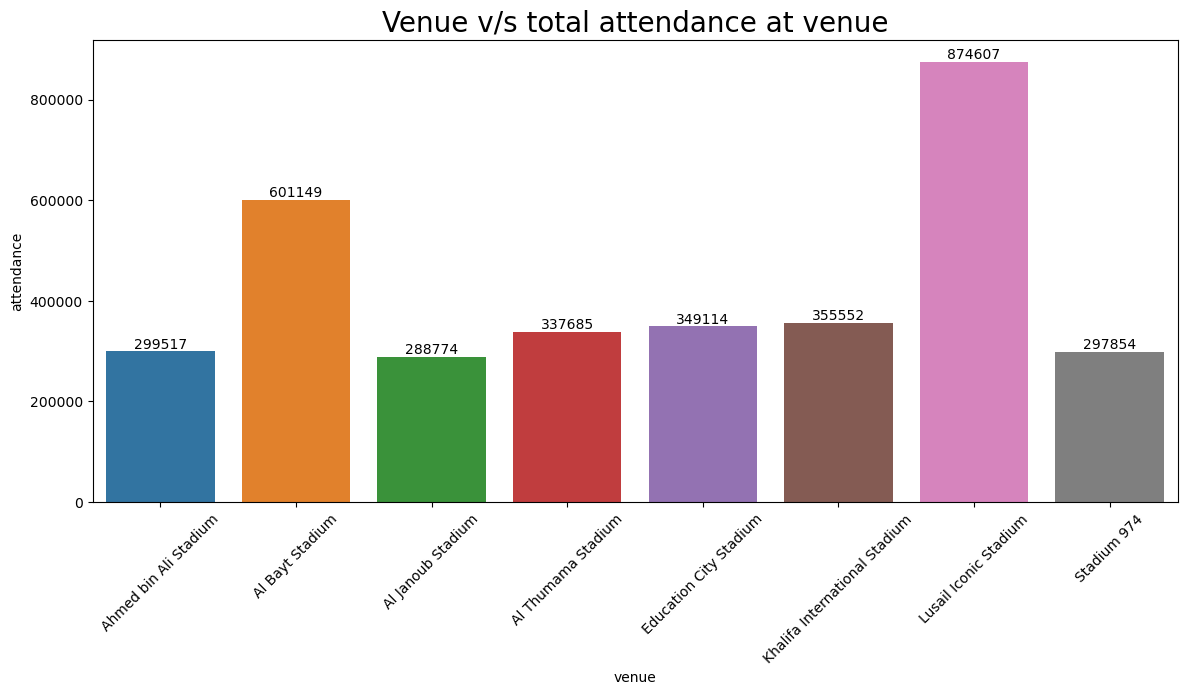

In [13]:
# Bar graph Venue v/s total attendance
x=match_df.groupby('venue')['attendance'].sum().index
y=match_df.groupby('venue')['attendance'].sum().values

df=pd.DataFrame({'venue':x,'attendance':y})

plt.figure(figsize=(14,6))
ax=sns.barplot(data=df,x='venue',y='attendance')
ax.bar_label(ax.containers[0])
plt.title('Venue v/s total attendance at venue',fontsize=20)
plt.xticks(rotation=45)
plt.show()

In [14]:
# total matches played and goal scored by the team
team_df=pd.DataFrame({'teams':match_df['1'].value_counts().sort_index().index,
                     'total_matches':match_df['1'].value_counts().sort_index().values + match_df['2'].value_counts().sort_index().values,
                     'total_goals':match_df.groupby(['1'])['1_goals'].sum().sort_index().values + match_df.groupby(['2'])['2_goals'].sum().sort_index().values})

# sort on total_goals
team_df.sort_values(by='total_goals',ascending=False)

,teams,total_matches,total_goals
11,FRANCE,7,16
0,ARGENTINA,7,15
10,ENGLAND,5,13
21,PORTUGAL,5,12
19,NETHERLANDS,5,10
26,SPAIN,4,9
3,BRAZIL,5,8
7,CROATIA,7,8
12,GERMANY,3,6
18,MOROCCO,7,6


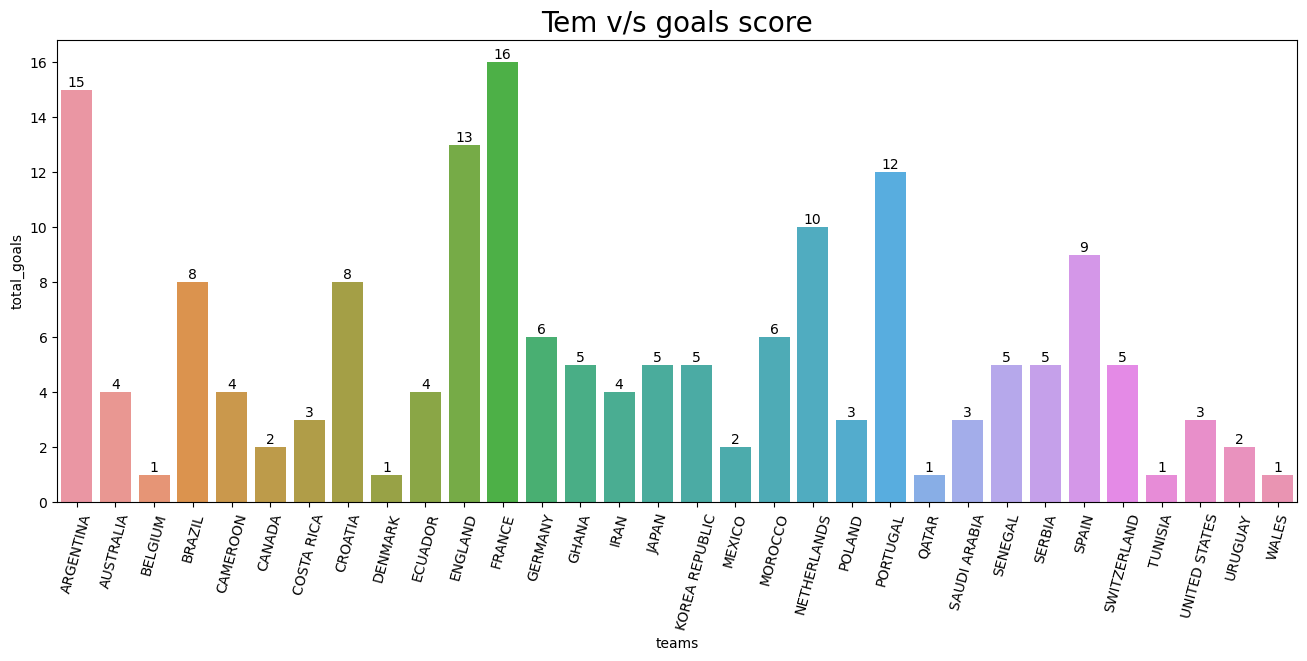

In [15]:
# Team v/s Goals scored
plt.figure(figsize=(16,6))
ax=sns.barplot(data=team_df,x='teams',y='total_goals')
ax.bar_label(ax.containers[0])
plt.title("Tem v/s goals score", fontsize=20)
plt.xticks(rotation=75)
plt.show()

**From the above we can say that France is the highest goal scoring team**

In [16]:
# goals conceded by each team 
team_df['goals_conceded']=match_df.groupby(['1'])['1_conceded'].sum().sort_index().values + match_df.groupby(['2'])['2_conceded'].sum().sort_index().values

# sort on goals_conceded
team_df.loc[:,['teams','total_matches','goals_conceded']].sort_values(by='goals_conceded',ascending=False)

,teams,total_matches,goals_conceded
6,COSTA RICA,3,11
27,SWITZERLAND,4,9
0,ARGENTINA,7,8
25,SERBIA,3,8
11,FRANCE,7,8
16,KOREA REPUBLIC,4,8
5,CANADA,3,7
14,IRAN,3,7
24,SENEGAL,4,7
22,QATAR,3,7


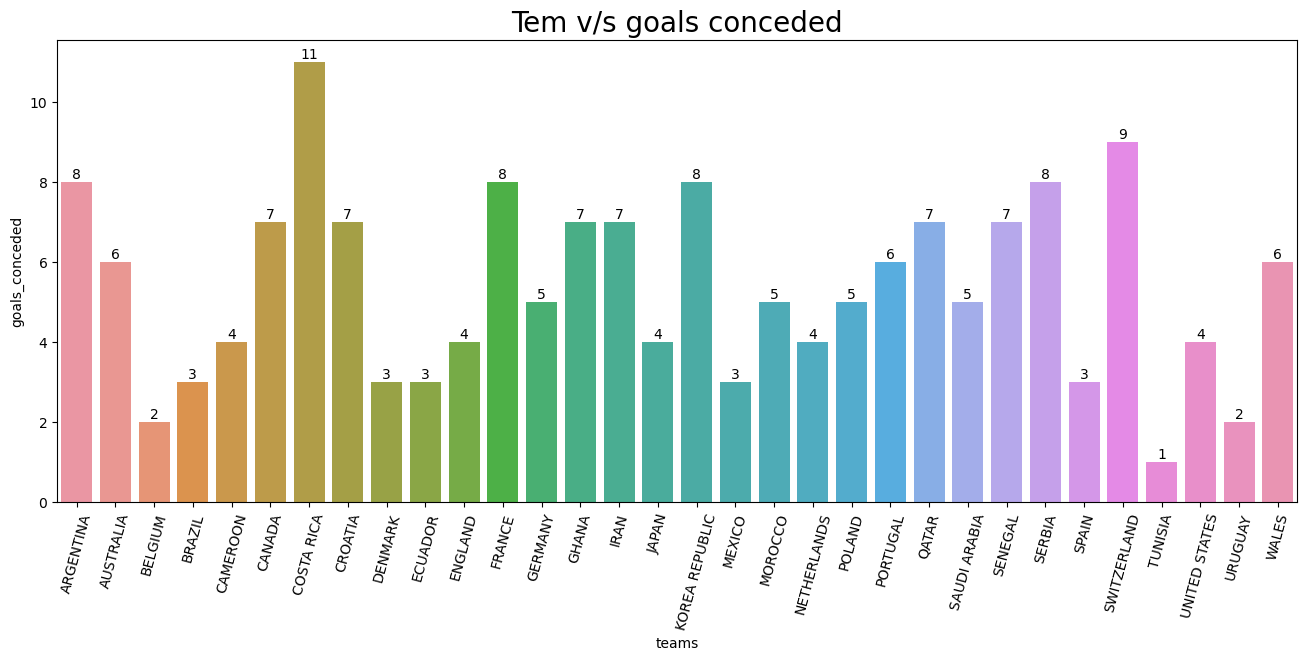

In [20]:
# Bar graph Teams v/s goals conceded

plt.figure(figsize=(16,6))
ax=sns.barplot(data=team_df,x='teams',y='goals_conceded')
ax.bar_label(ax.containers[0])
plt.title("Tem v/s goals conceded", fontsize=20)
plt.xticks(rotation=75)
plt.show()

**From the above we can say that COSRARICA team conceded highset goals**

In [21]:
# total hames played and goals attempted by the team
team_df['goals_attempted']=match_df.groupby(['1'])['1_attempts'].sum().sort_index().values + match_df.groupby(['2'])['2_attempts'].sum().sort_index().values
# sort on goals_attempted
team_df.loc[:,['teams','total_matches','goals_attempted']].sort_values(by='goals_attempted',ascending=False)

,teams,total_matches,goals_attempted
0,ARGENTINA,7,104
11,FRANCE,7,101
3,BRAZIL,5,90
7,CROATIA,7,81
12,GERMANY,3,67
21,PORTUGAL,5,62
18,MOROCCO,7,61
10,ENGLAND,5,60
26,SPAIN,4,51
24,SENEGAL,4,51


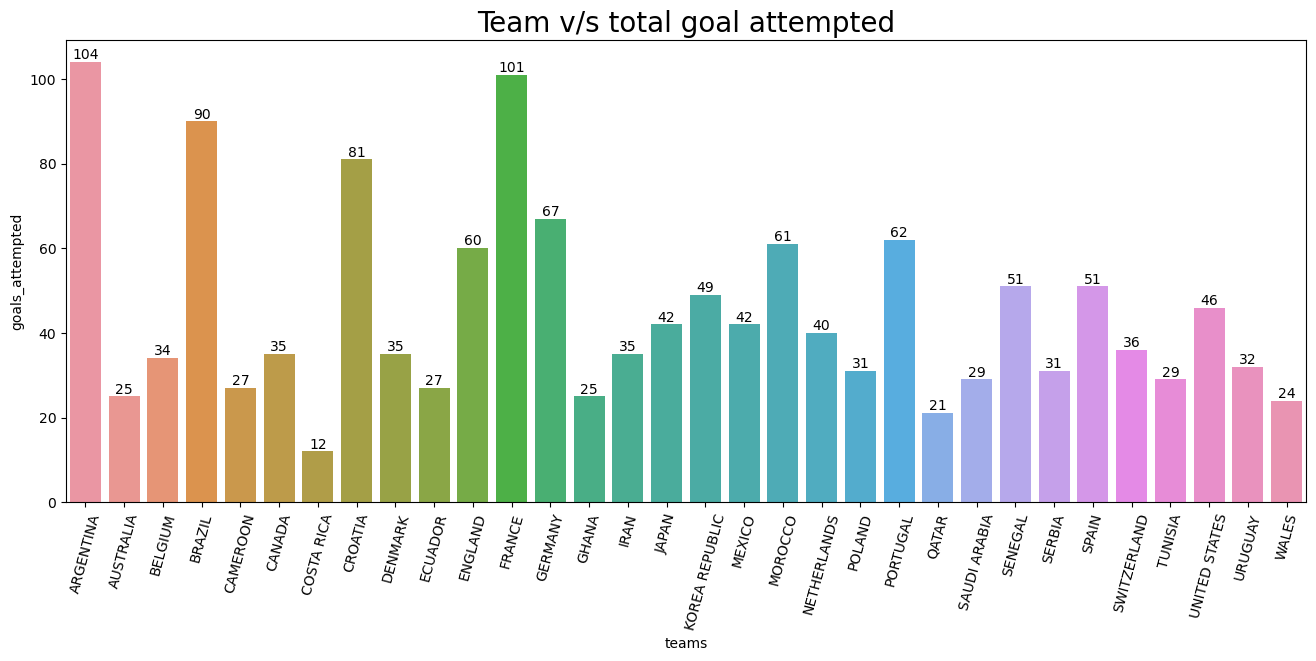

In [22]:
# bargraph Team v/s total goals attempted
plt.figure(figsize=(16,6))
ax=sns.barplot(data=team_df,x='teams',y='goals_attempted')
ax.bar_label(ax.containers[0])
plt.title("Team v/s total goal attempted", fontsize=20)
plt.xticks(rotation=75)
plt.show()

**From the above we can say that ARGENTINA team has attampted highest goals**

In [23]:
# total matches played and goals prevented by the team
team_df['goals_prevented']=match_df.groupby(['1'])['1_goal_prevented'].sum().sort_index().values + match_df.groupby(['2'])['2_goal_prevented'].sum().sort_index().values

# sort on goals_prevented
team_df.loc[:,['teams','total_matches','goals_prevented']].sort_values(by='goals_prevented',ascending=False)

,teams,total_matches,goals_prevented
7,CROATIA,7,82
11,FRANCE,7,80
18,MOROCCO,7,77
20,POLAND,4,72
19,NETHERLANDS,5,67
6,COSTA RICA,3,63
1,AUSTRALIA,4,63
15,JAPAN,4,62
25,SERBIA,3,51
21,PORTUGAL,5,51


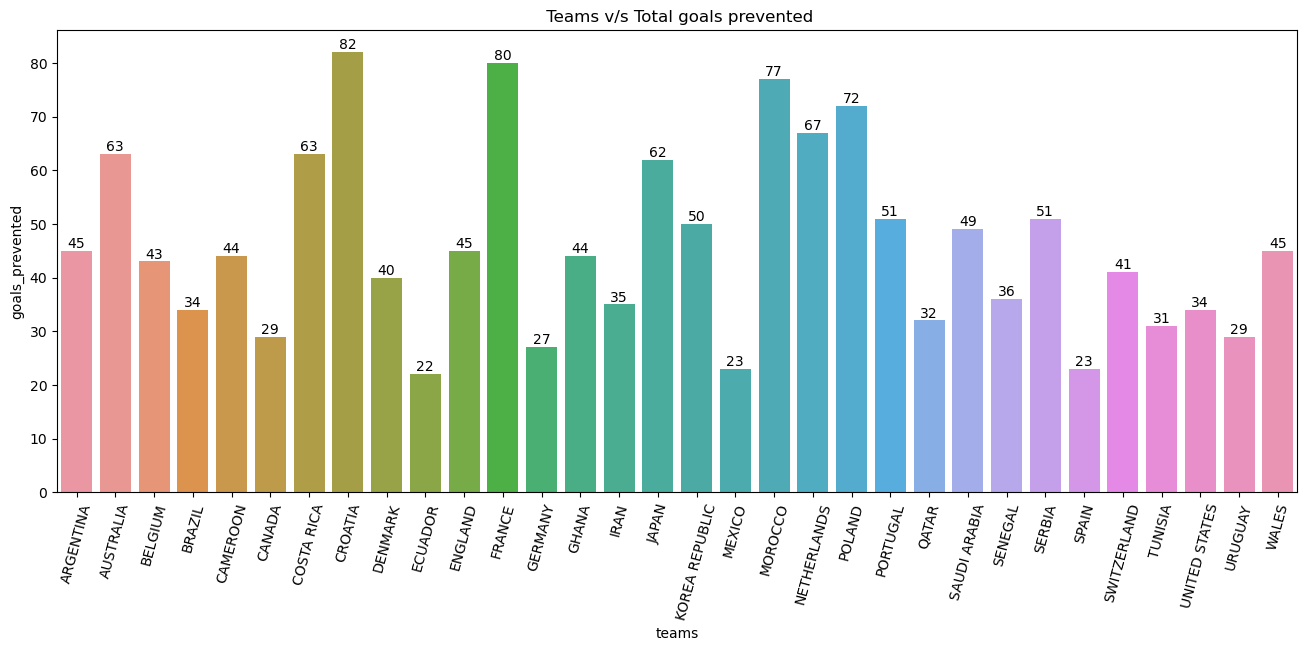

In [26]:
# Bargraph Tems v/s goals prevented
plt.figure(figsize=(16,6))
ax=sns.barplot(data=team_df,x='teams',y='goals_prevented')
ax.bar_label(ax.containers[0])
plt.title(" Teams v/s Total goals prevented")
plt.xticks(rotation=75)
plt.show()

**From the above we can say that CROATIA team has prevented highest goals**

In [27]:
# total matches played and yellow cards by the team
team_df['total_yellow_cards']=match_df.groupby(['1'])['1_yellow_cards'].sum().sort_index().values + match_df.groupby(['2'])['2_yellow_cards'].sum().sort_index().values

# sort on total_yellow_cards
team_df.loc[:,['teams','total_matches','total_yellow_cards']].sort_values(by='total_yellow_cards',ascending=False)

,teams,total_matches,total_yellow_cards
0,ARGENTINA,7,16
23,SAUDI ARABIA,3,14
25,SERBIA,3,12
18,MOROCCO,7,9
27,SWITZERLAND,4,9
4,CAMEROON,3,8
5,CANADA,3,8
7,CROATIA,7,8
19,NETHERLANDS,5,8
11,FRANCE,7,8


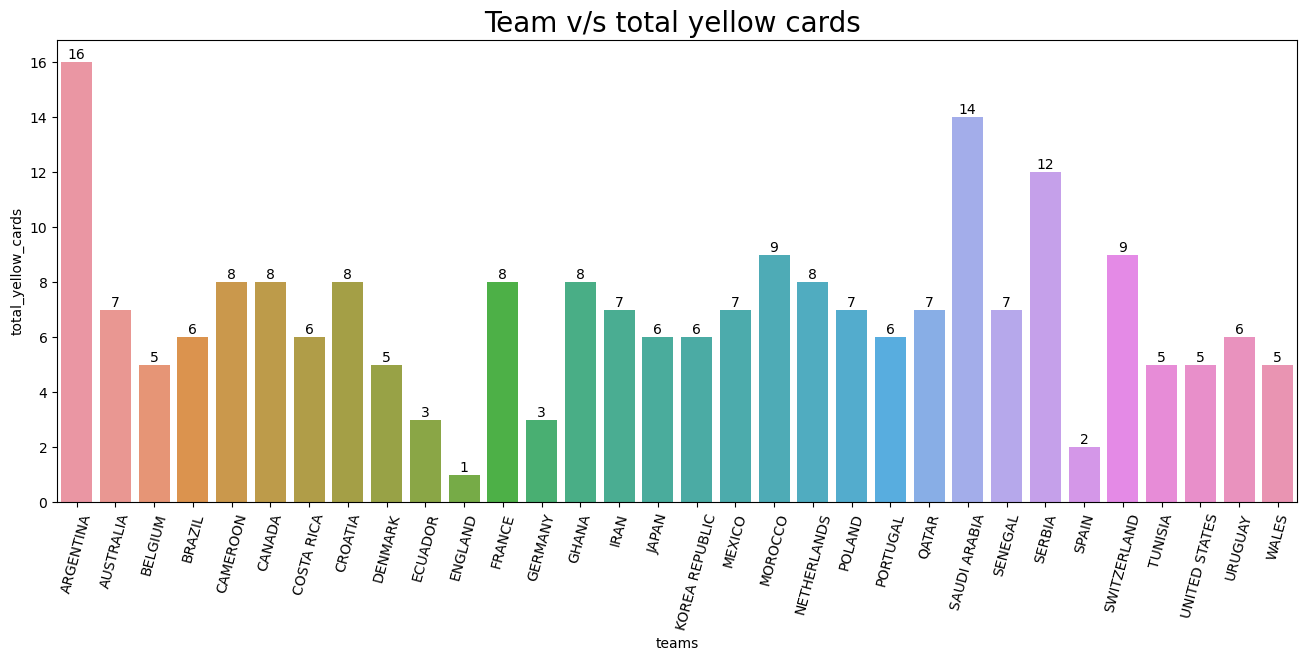

In [29]:
# Bargraph Team v/s Total yellow cards
plt.figure(figsize=(16,6))
ax=sns.barplot(data=team_df,x='teams',y='total_yellow_cards')
ax.bar_label(ax.containers[0])
plt.title("Team v/s total yellow cards ", fontsize=20)
plt.xticks(rotation=75)
plt.show()

**From the avove we can that ARGENTINA team got highest yellow cards**

In [30]:
# Teams with red cards
team_df['total_red_cards']=match_df.groupby(['1'])['1_red_cards'].sum().sort_index().values + match_df.groupby(['2'])['2_red_cards'].sum().sort_index().values

# sort on total_red_cards
team_df.loc[team_df['total_red_cards']!=0,['teams','total_matches','total_red_cards']].sort_values(by='total_red_cards',ascending=False)

,teams,total_matches,total_red_cards
4,CAMEROON,3,1
18,MOROCCO,7,1
31,WALES,3,1


**only three teams(WALES, CAMEROON, MOROCCO) got red cards**

In [31]:
# No of matches played and passes completed by the team
team_df['total_passes_completed']=match_df.groupby(['1'])['1_passes_compeletd'].sum().sort_index().values + match_df.groupby(['2'])['2_passes_compeletd'].sum().sort_index().values

# sort on total_passes_completed
team_df.loc[:,['teams','total_matches','total_passes_completed']].sort_values(by='total_passes_completed',ascending=False)

,teams,total_matches,total_passes_completed
0,ARGENTINA,7,3841
7,CROATIA,7,3724
26,SPAIN,4,3527
11,FRANCE,7,3192
10,ENGLAND,5,2723
3,BRAZIL,5,2696
21,PORTUGAL,5,2615
19,NETHERLANDS,5,2442
18,MOROCCO,7,2219
29,UNITED STATES,4,1777


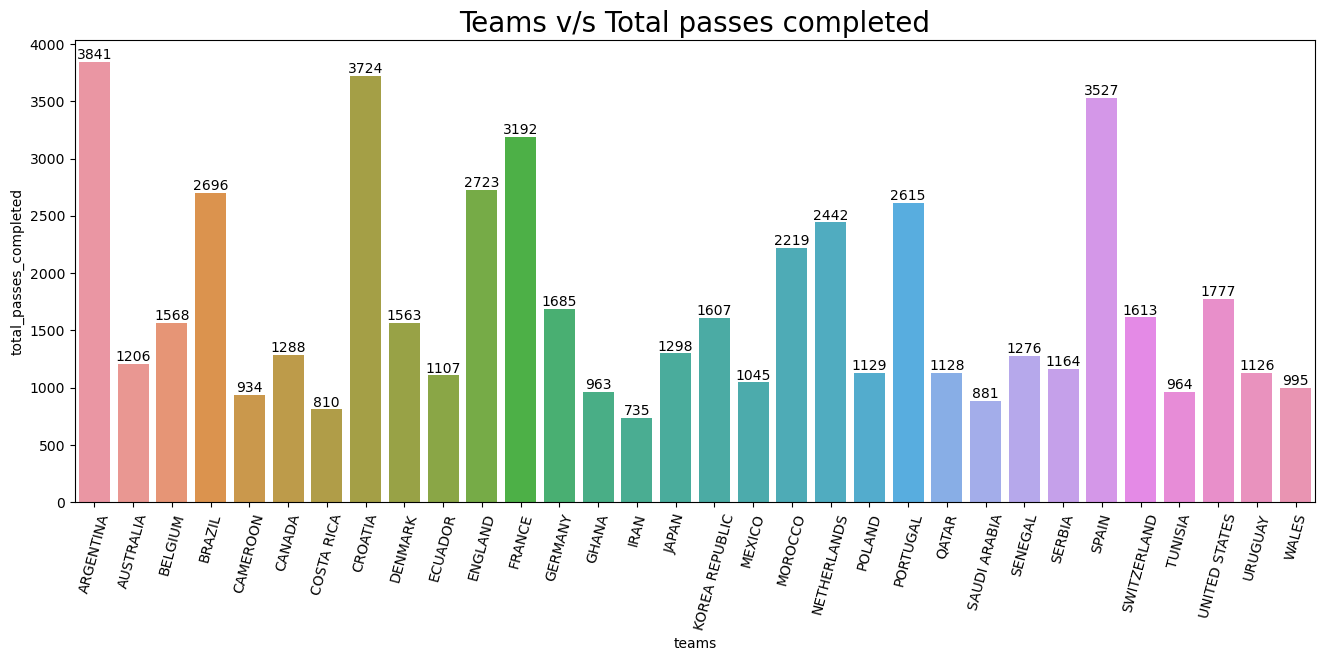

In [33]:
# Bargraph Team v/s total passes
plt.figure(figsize=(16,6))
ax=sns.barplot(data=team_df,x='teams',y="total_passes_completed")
ax.bar_label(ax.containers[0])
plt.title('Teams v/s Total passes completed',fontsize=20)
plt.xticks(rotation=75)
plt.show()

In [34]:
# no of matches played and possession by team
team_df['avg_possession']=round((match_df.groupby(['1'])['1_poss'].sum().sort_index().values + match_df.groupby(['2'])['2_poss'].sum().sort_index().values)/team_df['total_matches'],2)

# sort on avg_possession
team_df.loc[:,['teams','total_matches','avg_possession']].sort_values(by='avg_possession',ascending=False)

,teams,total_matches,avg_possession
26,SPAIN,4,75.75
10,ENGLAND,5,62.80
21,PORTUGAL,5,60.40
8,DENMARK,3,60.00
12,GERMANY,3,59.33
17,MEXICO,3,58.33
3,BRAZIL,5,56.20
0,ARGENTINA,7,55.57
7,CROATIA,7,55.57
2,BELGIUM,3,54.00


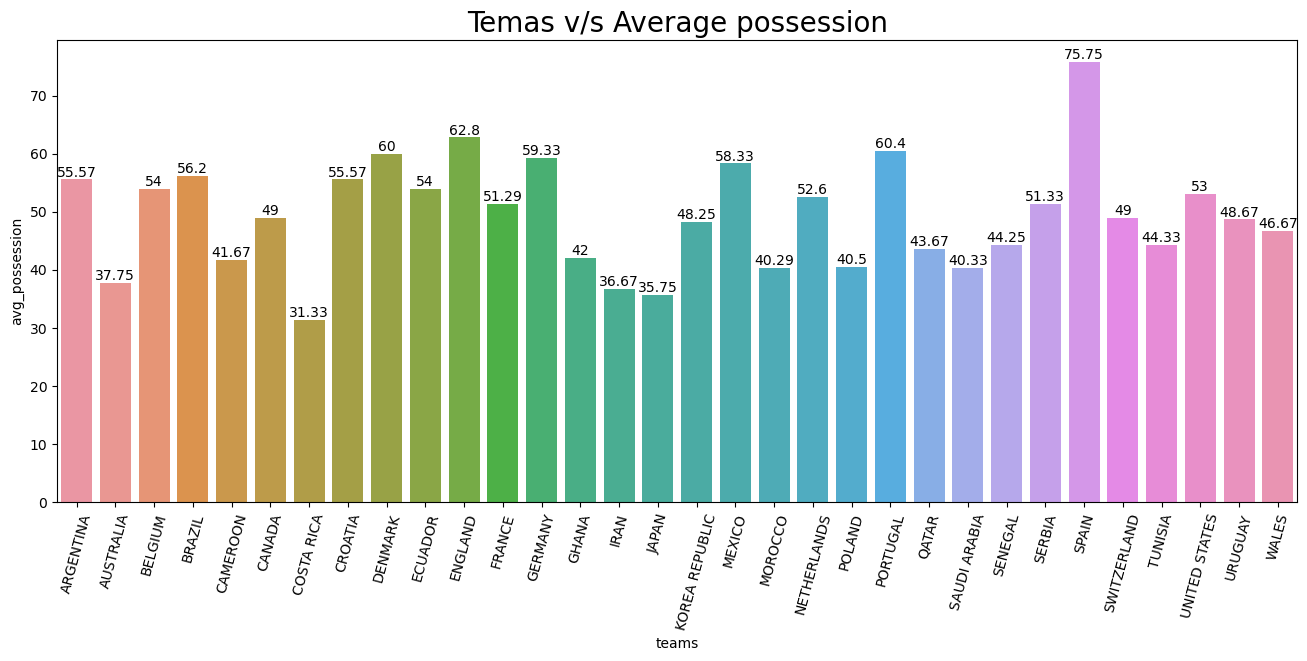

In [35]:
# Bargraph Team v/s avg possession

plt.figure(figsize=(16,6))
ax=sns.barplot(data=team_df,x='teams',y='avg_possession')
ax.bar_label(ax.containers[0])
plt.title('Temas v/s Average possession',fontsize=20)
plt.xticks(rotation=75)
plt.show()

In [36]:
# Teams with own goals
team_df['total_own_goals']=match_df.groupby(['1'])['1_own_goal'].sum().sort_index().values + match_df.groupby(['2'])['2_own_goal'].sum().sort_index().values

# sort on total_own_goals
team_df.loc[team_df['total_own_goals']!=0,['teams','total_matches','total_own_goals']].sort_values(by='total_own_goals',ascending=False)

,teams,total_matches,total_own_goals
0,ARGENTINA,7,1
18,MOROCCO,7,1


In [37]:
# No of matches played and passes completed by the team
team_df['total_passes_completed']=match_df.groupby(['1'])['1_passes_compeletd'].sum().sort_index().values + match_df.groupby(['2'])['2_passes_compeletd'].sum().sort_index().values

# sort on total_passes_completed
team_df.loc[:,['teams','total_matches','total_passes_completed']].sort_values(by='total_passes_completed',ascending=False)

,teams,total_matches,total_passes_completed
0,ARGENTINA,7,3841
7,CROATIA,7,3724
26,SPAIN,4,3527
11,FRANCE,7,3192
10,ENGLAND,5,2723
3,BRAZIL,5,2696
21,PORTUGAL,5,2615
19,NETHERLANDS,5,2442
18,MOROCCO,7,2219
29,UNITED STATES,4,1777


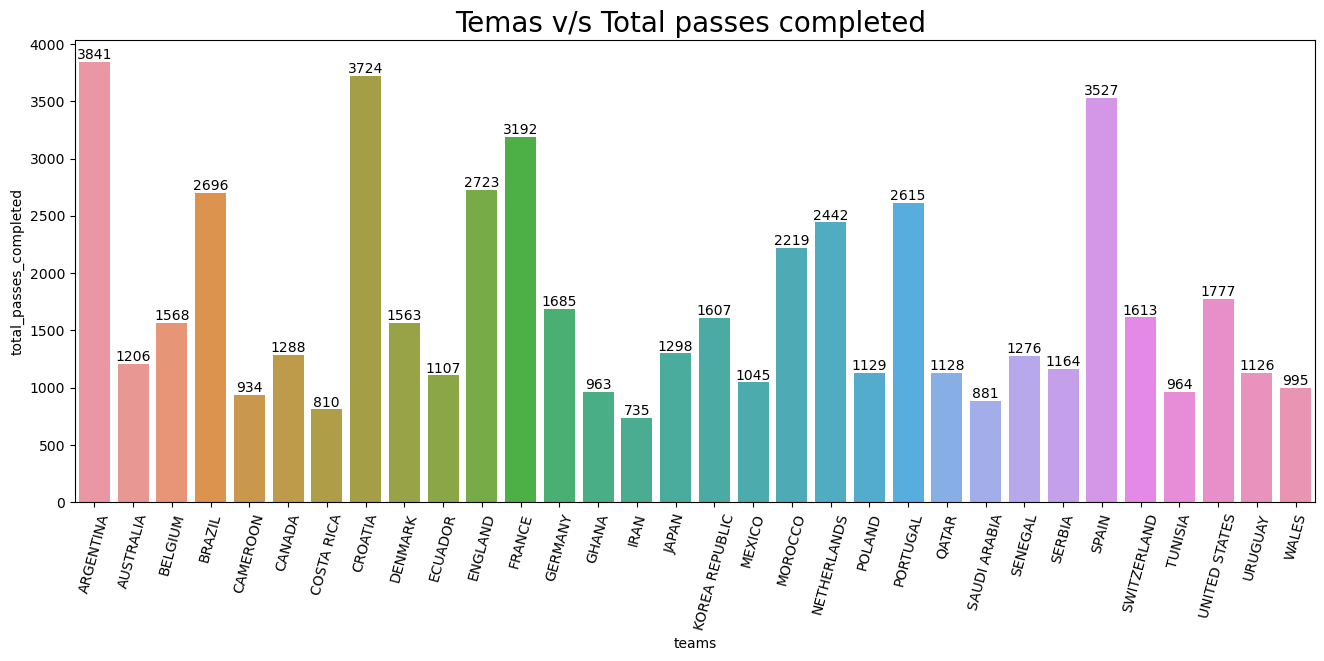

In [39]:
## Bargraph Team v/s total passes
plt.figure(figsize=(16,6))
ax=sns.barplot(data=team_df,x='teams',y='total_passes_completed')
ax.bar_label(ax.containers[0])
plt.title("Temas v/s Total passes completed ", fontsize=20)
plt.xticks(rotation=75)
plt.show()

In [40]:
# no of matches played and possession by team
team_df['avg_possession']=round((match_df.groupby(['1'])['1_poss'].sum().sort_index().values + match_df.groupby(['2'])['2_poss'].sum().sort_index().values)/team_df['total_matches'],2)

# sort on avg_possession
team_df.loc[:,['teams','total_matches','avg_possession']].sort_values(by='avg_possession',ascending=False)

,teams,total_matches,avg_possession
26,SPAIN,4,75.75
10,ENGLAND,5,62.80
21,PORTUGAL,5,60.40
8,DENMARK,3,60.00
12,GERMANY,3,59.33
17,MEXICO,3,58.33
3,BRAZIL,5,56.20
0,ARGENTINA,7,55.57
7,CROATIA,7,55.57
2,BELGIUM,3,54.00


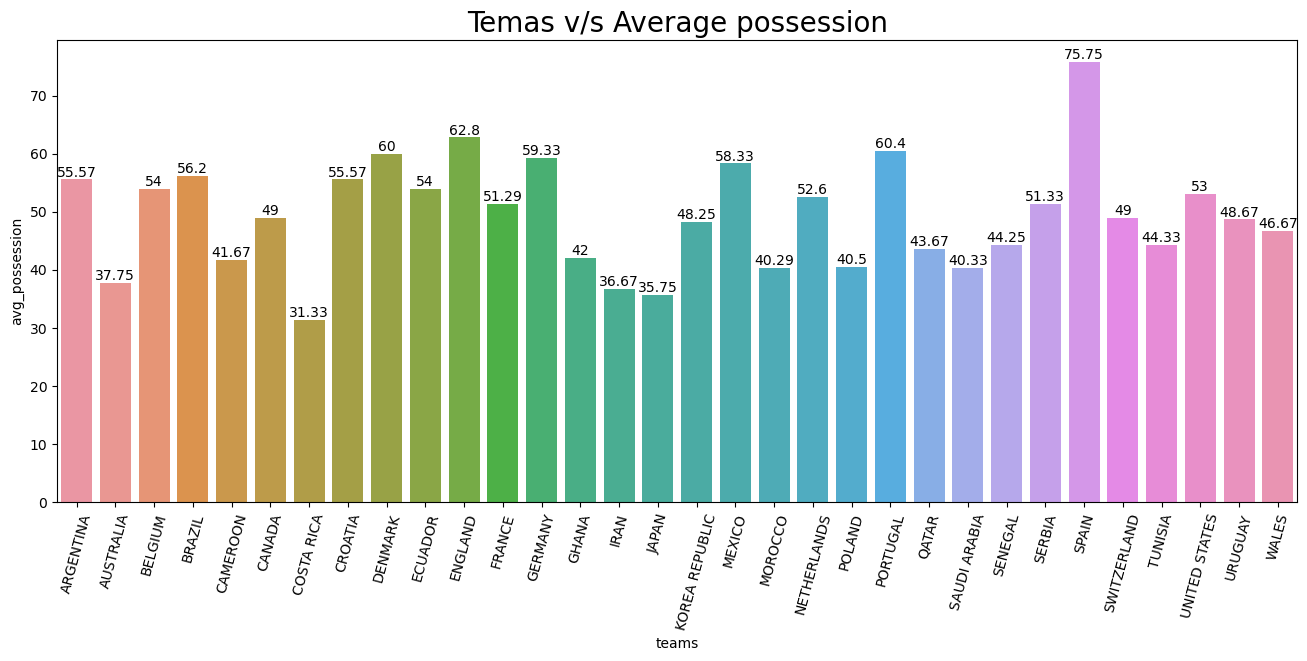

In [41]:
# Bargraph Team v/s avg possession

plt.figure(figsize=(16,6))
ax=sns.barplot(data=team_df,x='teams',y='avg_possession')
ax.bar_label(ax.containers[0])
plt.title('Temas v/s Average possession',fontsize=20)
plt.xticks(rotation=75)
plt.show()

In [42]:
# Teams with own goals
team_df['total_own_goals']=match_df.groupby(['1'])['1_own_goal'].sum().sort_index().values + match_df.groupby(['2'])['2_own_goal'].sum().sort_index().values

# sort on total_own_goals
team_df.loc[team_df['total_own_goals']!=0,['teams','total_matches','total_own_goals']].sort_values(by='total_own_goals',ascending=False)

,teams,total_matches,total_own_goals
0,ARGENTINA,7,1
18,MOROCCO,7,1


In [43]:
# Total games played and goals conceded by the team excluding own goals
team_df['goals_by_opponent']=team_df['goals_conceded']-team_df['total_own_goals']

# sort on goals_by_opponent
team_df.loc[:,['teams','total_matches','goals_conceded','goals_by_opponent']].sort_values(by='goals_by_opponent',ascending=False)

,teams,total_matches,goals_conceded,goals_by_opponent
6,COSTA RICA,3,11,11
27,SWITZERLAND,4,9,9
16,KOREA REPUBLIC,4,8,8
11,FRANCE,7,8,8
25,SERBIA,3,8,8
24,SENEGAL,4,7,7
22,QATAR,3,7,7
14,IRAN,3,7,7
13,GHANA,3,7,7
0,ARGENTINA,7,8,7


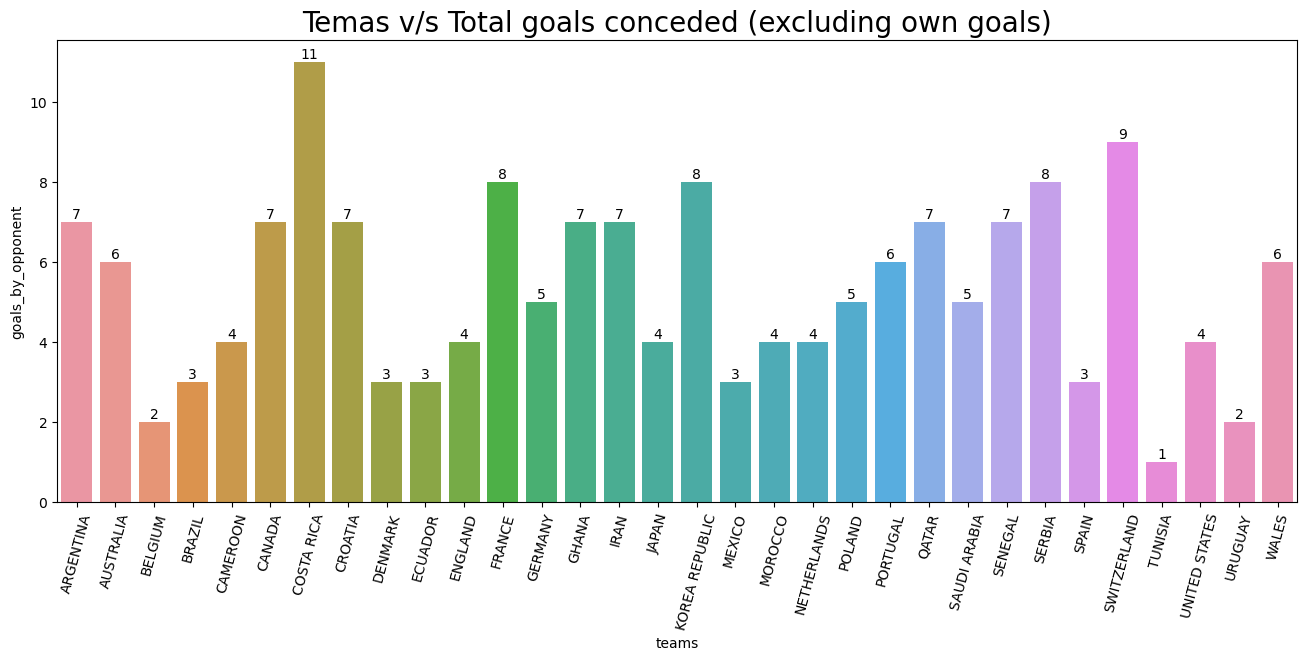

In [44]:
# Bargraph Temas v/s Total goals conceded(excluding own goal)
plt.figure(figsize=(16,6))
ax=sns.barplot(data=team_df,x='teams',y='goals_by_opponent')
ax.bar_label(ax.containers[0])
plt.title('Temas v/s Total goals conceded (excluding own goals)',fontsize=20)
plt.xticks(rotation=75)
plt.show()

# Player Statistics

In [46]:
players_df.head()

,player,position,team,age,club,birth_year,games,games_starts,minutes,minutes_90s,...,goals_assists_pens_per90,xg,npxg,xg_assist,npxg_xg_assist,xg_per90,xg_assist_per90,xg_xg_assist_per90,npxg_per90,npxg_xg_assist_per90
0,Aaron Mooy,MF,Australia,32-094,Celtic,1990,4,4,360,4.0,...,0.0,0.0,0.0,0.1,0.1,0.01,0.02,0.03,0.01,0.03
1,Aaron Ramsey,MF,Wales,31-357,Nice,1990,3,3,266,3.0,...,0.0,0.0,0.0,0.0,0.1,0.01,0.01,0.02,0.01,0.02
2,Abdelhamid Sabiri,MF,Morocco,26-020,Sampdoria,1996,5,2,181,2.0,...,0.5,0.1,0.1,0.9,1.0,0.08,0.53,0.60,0.08,0.60
3,Abdelkarim Hassan,DF,Qatar,29-112,Al Sadd SC,1993,3,3,270,3.0,...,0.0,0.3,0.3,0.0,0.3,0.10,0.01,0.11,0.10,0.11
4,Abderrazak Hamdallah,FW,Morocco,32-001,Al-Ittihad,1990,4,0,68,0.8,...,0.0,0.4,0.4,0.0,0.4,0.52,0.00,0.52,0.52,0.52


In [48]:
players_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680 entries, 0 to 679
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   player                    680 non-null    object 
 1   position                  680 non-null    object 
 2   team                      680 non-null    object 
 3   age                       680 non-null    object 
 4   club                      679 non-null    object 
 5   birth_year                680 non-null    int64  
 6   games                     680 non-null    int64  
 7   games_starts              680 non-null    int64  
 8   minutes                   680 non-null    int64  
 9   minutes_90s               680 non-null    float64
 10  goals                     680 non-null    int64  
 11  assists                   680 non-null    int64  
 12  goals_pens                680 non-null    int64  
 13  pens_made                 680 non-null    int64  
 14  pens_att  

In [49]:
players_df.isna().sum().sort_values(ascending=False)

npxg_xg_assist_per90        5
npxg_per90                  5
xg_xg_assist_per90          5
xg_assist_per90             5
xg_per90                    5
npxg_xg_assist              3
xg_assist                   3
npxg                        3
xg                          3
club                        1
cards_red                   0
goals_assists_pens_per90    0
goals_pens_per90            0
goals_assists_per90         0
assists_per90               0
goals_per90                 0
player                      0
position                    0
pens_att                    0
pens_made                   0
goals_pens                  0
assists                     0
goals                       0
minutes_90s                 0
minutes                     0
games_starts                0
games                       0
birth_year                  0
age                         0
team                        0
cards_yellow                0
dtype: int64

In [51]:
# Top Goal scorer of WC 2022 
players_df.loc[players_df['goals']==players_df['goals'].max(),['player','team','birth_year','games','club','goals']]

,player,team,birth_year,games,club,goals
377,Kylian Mbappé,France,1998,7,Paris S-G,8


In [53]:
# Top 5 Goal scorer of WC 2022
players_df.loc[:,['player','team','birth_year','games','club','goals']].sort_values(by='goals',ascending=False).head()

,player,team,birth_year,games,club,goals
377,Kylian Mbappé,France,1998,7,Paris S-G,8
388,Lionel Messi,Argentina,1987,7,Paris S-G,7
330,Julián Álvarez,Argentina,2000,7,Manchester City,4
502,Olivier Giroud,France,1986,6,Milan,4
672,Álvaro Morata,Spain,1992,4,Atlético Madrid,3


In [57]:
# Top Goal assist of WC 2022
players_df.loc[players_df['assists']==players_df['assists'].max(),['player','team','club','assists','goals']].sort_values(by='goals',ascending=False)

,player,team,club,assists,goals
388,Lionel Messi,Argentina,Paris S-G,3,7
103,Bruno Fernandes,Portugal,Manchester Utd,3,2
240,Harry Kane,England,Tottenham,3,2
273,Ivan Perišić,Croatia,Tottenham,3,1
63,Antoine Griezmann,France,Atlético Madrid,3,0


In [59]:
# Top 5 players with yellow cards holder
players_df.loc[:,['player','games','club','assists','cards_yellow']].sort_values(by='cards_yellow',ascending=False).head()

,player,games,club,assists,cards_yellow
407,Marcos Acuña,6,Sevilla,0,3
227,Gonzalo Montiel,4,Sevilla,0,3
603,Strahinja Pavlović,3,RB Salzburg,0,2
366,Ko Itakura,3,M'Gladbach,1,2
276,Jackson Irvine,4,St. Pauli,0,2
